# HW2_ex_2_1

In [5]:
import numpy as np

class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(-b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)

P = np.array([[0, -4, 1.7, -2],
              [1, 3, -1, -3],
              [2, -3, 0, 1.5]])

outputs = np.array([[0.4, -1.6, -3.7, -0.9]])

W1 = np.random.normal(0,1,(3,3))
W2 = np.random.normal(0,1,(1,3))
b1 = np.random.normal(0,1,(3,1))
b2 = np.random.normal(0,1,(1,1))

activation1 = ReLU()
activation2 = Linear()

lr = 0.01
Loss = MSE_loss()

for epoch in range(1000):

    count = 0
    # SGD optimizer
    for i in range(P.shape[1]):

        x = P[:,i]
        d = outputs[:,i]

        n1 = np.matmul(W1, x) + b1[:,0]
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output) + b2[:,0]
        activation2.forward(n2)
        if np.abs(activation2.output - outputs[0,i]) <= 0.1:
            
            count += 1 
        Loss.forward(d, activation2.output)

        # print(activation1.output.shape)
        
        # Backward Propagation

        e = d - activation2.output
        loss_derivative1 = Loss.backward(activation2.output, d)
        s2 = activation2.backward(loss_derivative1)


        loss_derivative2 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative2)
        

        # updating weights and biases
        
        
        W1 = W1 - lr*np.matmul(s1.reshape((3,1)),x.reshape(1,3))
        W2 = W2 - lr*s2*activation1.output.T
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2

    accuracy = count/P.shape[0]
    
        
    print(f"Loss = {Loss.output}")
    print(f"accuracy = {count/P.shape[1]}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    


Loss = 46.391095236057275
accuracy = 0.0
epoch: 0
--------------------------------------------
Loss = 39.478527445421996
accuracy = 0.0
epoch: 1
--------------------------------------------
Loss = 1.0651514816690084
accuracy = 0.0
epoch: 2
--------------------------------------------
Loss = 0.022288611161065557
accuracy = 0.25
epoch: 3
--------------------------------------------
Loss = 6.533019638822561e-05
accuracy = 0.5
epoch: 4
--------------------------------------------
Loss = 0.00033865157071398126
accuracy = 0.5
epoch: 5
--------------------------------------------
Loss = 0.0005722742999015858
accuracy = 0.5
epoch: 6
--------------------------------------------
Loss = 0.0006149184385091128
accuracy = 0.5
epoch: 7
--------------------------------------------
Loss = 0.0005972536734725796
accuracy = 0.5
epoch: 8
--------------------------------------------
Loss = 0.0005627145095951304
accuracy = 0.5
epoch: 9
--------------------------------------------
Loss = 0.0005247508098780525

# HW2_ex_2_2

In [182]:
import numpy as np
with open("D:/university/arshad/term 3/ANN/hws_git/HW2/2/housing_train.txt", 'r') as file:
    lines = file.readlines()
    x_trains = []
    y_trains = []
    for row in lines:
        x_train = []
        y_train = []
        for item in row.split(" "):
            if len(item) > 0:
                if len(x_train) < 13:
                    x_train.append(float(item))
                else:
                    y_train.append(float(item))
        x_trains.append(x_train)
        y_trains.append(y_train)
    file.close()

x_trains = np.array(x_trains)
y_trains = np.array(y_trains)
print(x_trains.shape)
print(y_trains.shape)

(433, 13)
(433, 1)


In [183]:
import glob
import numpy as np
with open("D:/university/arshad/term 3/ANN/hws_git/HW2/2/housing_test.txt", 'r') as file:
    lines = file.readlines()
    x_tests = []
    y_tests = []
    for row in lines:
        x_test = []
        y_test = []
        for item in row.split(" "):
            if len(item) > 0:
                if len(x_test) < 13:
                    x_test.append(float(item))
                else:
                    y_test.append(float(item))
        x_tests.append(x_test)
        y_tests.append(y_test)
    file.close()
x_tests = np.array(x_tests)
y_tests = np.array(y_tests)
print(x_tests.shape)
print(y_tests.shape)

(74, 13)
(74, 1)


In [184]:
def normalize_input_features(X):
    max_ = []
    min_ = []
    for feature_index in range(X.shape[1]):
        max_.append(np.max(X[:, feature_index]))
        min_.append(np.min(X[:, feature_index]))
        X[:, feature_index] = (X[:, feature_index] - min_[-1])/(max_[-1] - min_[-1])
    return max_, min_, X

maxs_train, mins_train, x_normalized_trains = normalize_input_features(x_trains)
x_normalized_tests = x_tests.copy()
for feature_index in range(x_normalized_tests.shape[1]):
    x_normalized_tests[:, feature_index] = (x_normalized_tests[:, feature_index] - mins_train[feature_index])/(maxs_train[feature_index] - mins_train[feature_index])


In [186]:
print(x_normalized_tests[0])
print(x_tests[0])

[0.00937643 0.         0.30488289 0.         0.30480167 0.39049626
 0.85272915 0.30235794 0.13043478 0.25052192 0.97674419 0.76428463
 0.41929078]
[  0.84054   0.        8.14      0.        0.538     5.599    85.7
   4.4546    4.      307.       21.      303.42     16.51   ]


# Part_A

Loss = 252.2570199629465
Loss_test = 60.098181644117176
epoch: 0
--------------------------------------------
Loss = 104.95720047597744
Loss_test = 43.19365335878857
epoch: 1
--------------------------------------------
Loss = 89.01283784681947
Loss_test = 37.66194455736129
epoch: 2
--------------------------------------------
Loss = 80.33963185311738
Loss_test = 34.56308039637452
epoch: 3
--------------------------------------------
Loss = 74.27354986569485
Loss_test = 32.77051997209439
epoch: 4
--------------------------------------------
Loss = 69.83253207284095
Loss_test = 31.764826084568902
epoch: 5
--------------------------------------------
Loss = 66.48598174240013
Loss_test = 31.22809962222409
epoch: 6
--------------------------------------------
Loss = 63.88595054428625
Loss_test = 30.959315954581893
epoch: 7
--------------------------------------------
Loss = 61.79847947318928
Loss_test = 30.832790794693246
epoch: 8
--------------------------------------------
Loss = 60.0659

Text(0.5, 1.0, 'Loss_Part_A')

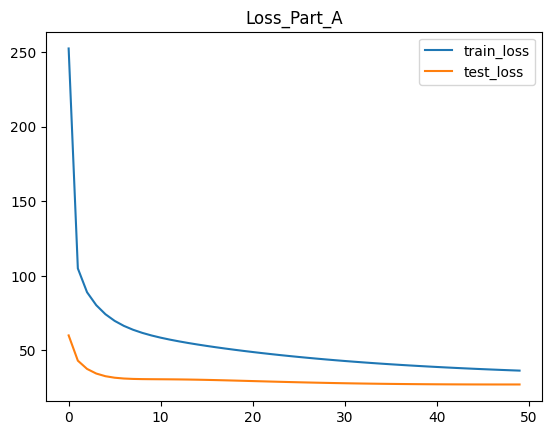

In [187]:
import numpy as np
import matplotlib.pyplot as plt

class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(-b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)


def test(x_tests, y_tests, W1, b1):

    mean_batch_Loss = []
    batch_Loss = []

    for i in range(x_tests.shape[0]):

        x = x_tests[i,:]
        d = y_tests[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        Loss.forward(d, activation1.output)
        
        batch_Loss.append(Loss.output)

        if ( (i+1)%16 == 0 ):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 72):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass

    return(np.mean(mean_batch_Loss))
    




W1 = np.random.normal(0,1,(1,13))
b1 = np.random.normal(0,1,(1,1))


activation1 = Linear()

lr = 0.01
Loss = MSE_loss()


W1_batch = []
b1_batch = []


mean_batch_Loss = []
batch_Loss = []

Losses = []
Losses_test = []

for epoch in range(50):

    
    # SGD optimizer
    for i in range(x_normalized_trains.shape[0]):

        x = x_normalized_trains[i,:]
        d = y_trains[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        Loss.forward(d, activation1.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation1.output, d)
        s1 = activation1.backward(loss_derivative1)

        # updating weights and biases
        W1_batch.append(lr*np.matmul(s1,x.reshape(1,13)))
        
        b1_batch.append(lr*s1)

        batch_Loss.append(Loss.output)
        if ( (i+1)%16 == 0 ):

            W1_batch_temp = W1_batch
            W1 = W1 - np.mean(np.array(W1_batch).reshape((16,13)), axis = 0).reshape((1,13))
            b1 = b1 - np.mean(np.array(b1_batch))

            # W1_batch_temp = W1_batch
            W1_batch = []
            b1_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 432):

            W1 = W1 - np.mean(np.array(W1_batch))
            b1 = b1 - np.mean(np.array(b1_batch))
            W1_batch = []
            b1_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass
    
    Losses_test.append(test(x_normalized_tests, y_tests, W1, b1))

    
        
    print(f"Loss = {np.mean(mean_batch_Loss)}")
    print(f"Loss_test = {test(x_normalized_tests, y_tests, W1, b1)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_batch_Loss))
    mean_batch_Loss = []


plt.plot(range(len(Losses)), Losses, label = "train_loss")
plt.plot(range(len(Losses_test)), Losses_test, label = "test_loss")
plt.legend()
plt.title("Loss_Part_A")


# Part_B

Loss = 224.64150464743645
Loss_test = 253.40990905108623
epoch: 0
--------------------------------------------
Loss = 104.03029139201216
Loss_test = 42.68236072975844
epoch: 1
--------------------------------------------
Loss = 57.940738994021224
Loss_test = 31.32067253126338
epoch: 2
--------------------------------------------
Loss = 48.52234803906264
Loss_test = 26.15499924805245
epoch: 3
--------------------------------------------
Loss = 40.84185303055354
Loss_test = 25.012489497771227
epoch: 4
--------------------------------------------
Loss = 35.41274818769201
Loss_test = 25.73508557231897
epoch: 5
--------------------------------------------
Loss = 31.56535707557162
Loss_test = 26.333386915266097
epoch: 6
--------------------------------------------
Loss = 29.787081220227147
Loss_test = 27.868985505224817
epoch: 7
--------------------------------------------
Loss = 28.89648693636212
Loss_test = 29.27032403545042
epoch: 8
--------------------------------------------
Loss = 28.4

Text(0.5, 1.0, 'Loss_Part_B')

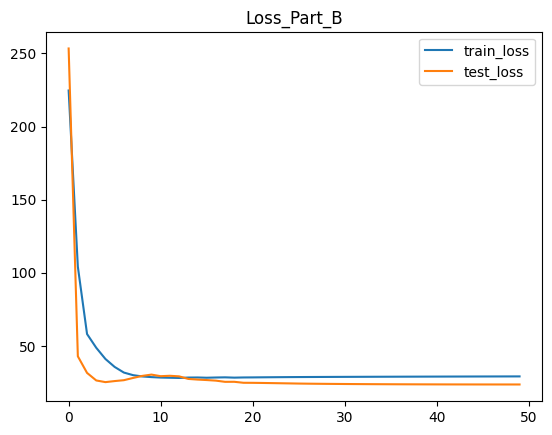

In [188]:
import numpy as np
import matplotlib.pyplot as plt

class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(-b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    
def test(x_tests, y_tests, W1, W2, b1, b2):

    mean_batch_Loss = []
    batch_Loss = []

    for i in range(x_tests.shape[0]):

        x = x_tests[i,:]
        d = y_tests[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output) + b2[:,0]
        activation2.forward(n2)
        Loss.forward(d, activation2.output)
        
        batch_Loss.append(Loss.output)

        if ( (i+1)%16 == 0 ):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 72):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass

    return(np.mean(mean_batch_Loss))


W1 = np.random.normal(0,1,(5,13))
W2 = np.random.normal(0,1,(1,5))
b1 = np.random.normal(0,1,(5,1))
b2 = np.random.normal(0,1,(1,1))


activation1 = ReLU()
activation2 = Linear()

lr = 0.01
Loss = MSE_loss()


W1_batch = []
W2_batch = []
b1_batch = []
b2_batch = []


mean_batch_Loss = []
batch_Loss = []

Losses = []
Losses_test = []
for epoch in range(50):

    
    # SGD optimizer
    for i in range(x_normalized_trains.shape[0]):

        x = x_normalized_trains[i,:]
        d = y_trains[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output) + b2[:,0]
        activation2.forward(n2)
        Loss.forward(d, activation2.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation2.output, d)
        s2 = activation2.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative2)

        # updating weights and biases
        W1_batch.append(lr*np.matmul(s1.reshape((5,1)),x.reshape(1,13)))
        W2_batch.append(lr*s2*activation1.output.T)
        
        b1_batch.append(lr*s1)
        b2_batch.append(lr*s2)

        batch_Loss.append(Loss.output)
        if ( (i+1)%16 == 0 ):

            W1_batch_temp = W2_batch
            b1_batch_temp = b1_batch
            W1 = W1 - np.mean(np.array(W1_batch), axis = 0)
            W2 = W2 - np.mean(np.array(W2_batch).reshape((16,5)), axis = 0).reshape((1,5))
            b1 = b1 - np.mean(np.array(b1_batch).reshape((16,5)), axis = 0).reshape((5,1))
            b2 = b2 - np.mean(np.array(b2_batch))   

            # W1_batch_temp = W1_batch
            W1_batch = []
            W2_batch = []
            b1_batch = []
            b2_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 432):

            W1 = W1 - np.mean(np.array(W1_batch))
            W2 = W2 - np.mean(np.array(W2_batch))
            b1 = b1 - np.mean(np.array(b1_batch))
            b2 = b2 - np.mean(np.array(b2_batch))
            W1_batch = []
            W2_batch = []
            b1_batch = []
            b2_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass
    
    
        
    Losses_test.append(test(x_normalized_tests, y_tests, W1, W2, b1, b2))

    
        
    print(f"Loss = {np.mean(mean_batch_Loss)}")
    print(f"Loss_test = {test(x_normalized_tests, y_tests, W1, W2, b1, b2)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_batch_Loss))
    mean_batch_Loss = []


plt.plot(range(len(Losses)), Losses, label = "train_loss")
plt.plot(range(len(Losses_test)), Losses_test, label = "test_loss")
plt.legend()
plt.title("Loss_Part_B")

# Part_C

Loss = 166.5092141071814
Loss_test = 48.197273204050234
epoch: 0
--------------------------------------------
Loss = 82.88139767438847
Loss_test = 41.293358352760116
epoch: 1
--------------------------------------------
Loss = 77.03698119848103
Loss_test = 36.9427455723788
epoch: 2
--------------------------------------------
Loss = 72.75588799912421
Loss_test = 33.666305402083836
epoch: 3
--------------------------------------------
Loss = 69.08750628934689
Loss_test = 30.824232389499535
epoch: 4
--------------------------------------------
Loss = 65.39601071570554
Loss_test = 28.057932372175998
epoch: 5
--------------------------------------------
Loss = 61.61270974442629
Loss_test = 25.805489638691967
epoch: 6
--------------------------------------------
Loss = 58.137390810881136
Loss_test = 24.074732770572137
epoch: 7
--------------------------------------------
Loss = 55.23981808007155
Loss_test = 22.747440489087246
epoch: 8
--------------------------------------------
Loss = 52.5

Text(0.5, 1.0, 'Loss_Part_C')

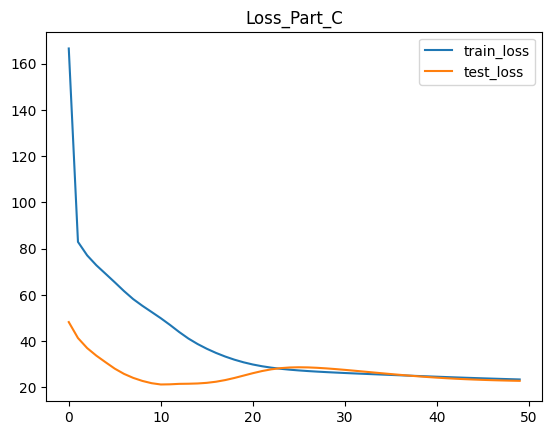

In [189]:
import numpy as np
import matplotlib.pyplot as plt

class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    
def test(x_tests, y_tests, W1, W2, b1, b2):

    mean_batch_Loss = []
    batch_Loss = []

    for i in range(x_tests.shape[0]):

        x = x_tests[i,:]
        d = y_tests[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output) + b2[:,0]
        activation2.forward(n2)
        Loss.forward(d, activation2.output)
        
        batch_Loss.append(Loss.output)

        if ( (i+1)%16 == 0 ):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 72):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass

    return(np.mean(mean_batch_Loss))


W1 = np.random.normal(0,1,(10,13))
W2 = np.random.normal(0,1,(1,10))
b1 = np.random.normal(0,1,(10,1))
b2 = np.random.normal(0,1,(1,1))


activation1 = sigmoid()
activation2 = Linear()

lr = 0.01
Loss = MSE_loss()


W1_batch = []
W2_batch = []
b1_batch = []
b2_batch = []


mean_batch_Loss = []
batch_Loss = []

Losses = []
Losses_test = []
for epoch in range(50):

    
    # SGD optimizer
    for i in range(x_normalized_trains.shape[0]):

        x = x_normalized_trains[i,:]
        d = y_trains[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output) + b2[:,0]
        activation2.forward(n2)
        Loss.forward(d, activation2.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation2.output, d)
        s2 = activation2.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative2)

        # updating weights and biases
        W1_batch.append(lr*np.matmul(s1.reshape((10,1)),x.reshape(1,13)))
        W2_batch.append(lr*s2*activation1.output.T)
        
        b1_batch.append(lr*s1)
        b2_batch.append(lr*s2)

        batch_Loss.append(Loss.output)
        if ( (i+1)%16 == 0 ):

            W1_batch_temp = W2_batch
            b1_batch_temp = b1_batch
            W1 = W1 - np.mean(np.array(W1_batch), axis = 0)
            W2 = W2 - np.mean(np.array(W2_batch).reshape((16,10)), axis = 0).reshape((1,10))
            b1 = b1 - np.mean(np.array(b1_batch).reshape((16,10)), axis = 0).reshape((10,1))
            b2 = b2 - np.mean(np.array(b2_batch))   

            # W1_batch_temp = W1_batch
            W1_batch = []
            W2_batch = []
            b1_batch = []
            b2_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 432):

            W1 = W1 - np.mean(np.array(W1_batch))
            W2 = W2 - np.mean(np.array(W2_batch))
            b1 = b1 - np.mean(np.array(b1_batch))
            b2 = b2 - np.mean(np.array(b2_batch))
            W1_batch = []
            W2_batch = []
            b1_batch = []
            b2_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass
    
    
        
    Losses_test.append(test(x_normalized_tests, y_tests, W1, W2, b1, b2))

    
        
    print(f"Loss = {np.mean(mean_batch_Loss)}")
    print(f"Loss_test = {test(x_normalized_tests, y_tests, W1, W2, b1, b2)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_batch_Loss))
    mean_batch_Loss = []


plt.plot(range(len(Losses)), Losses, label = "train_loss")
plt.plot(range(len(Losses_test)), Losses_test, label = "test_loss")
plt.legend()
plt.title("Loss_Part_C")

# part_D

Loss = 223.32484311298774
Loss_test = 44.542897368349486
epoch: 0
--------------------------------------------
Loss = 93.43977188281669
Loss_test = 36.481727591029944
epoch: 1
--------------------------------------------
Loss = 87.21579807003543
Loss_test = 31.421341611507152
epoch: 2
--------------------------------------------
Loss = 79.0620052812546
Loss_test = 43.23145563946041
epoch: 3
--------------------------------------------
Loss = 76.40171363127244
Loss_test = 28.21790510881423
epoch: 4
--------------------------------------------
Loss = 74.98169722449634
Loss_test = 26.78579897274115
epoch: 5
--------------------------------------------
Loss = 67.53999810734011
Loss_test = 30.237860326863462
epoch: 6
--------------------------------------------
Loss = 61.36359973707205
Loss_test = 30.811506264082322
epoch: 7
--------------------------------------------
Loss = 61.02450226215361
Loss_test = 34.45840214215484
epoch: 8
--------------------------------------------
Loss = 59.0978

Text(0.5, 1.0, 'Loss_Part_D')

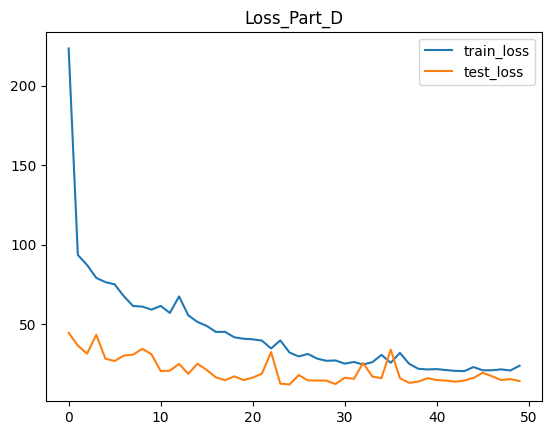

In [190]:
import numpy as np
import matplotlib.pyplot as plt

class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    
def test(x_tests, y_tests, W1, W2, W3, b1, b2, b3):

    mean_batch_Loss = []
    batch_Loss = []

    for i in range(x_tests.shape[0]):

        x = x_tests[i,:]
        d = y_tests[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((10,1))) + b2[:,0].reshape((5,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        batch_Loss.append(Loss.output)

        if ( (i+1)%16 == 0 ):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 72):

            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass

    return(np.mean(mean_batch_Loss))


W1 = np.random.normal(0,1,(10,13))
W2 = np.random.normal(0,1,(5,10))
W3 = np.random.normal(0,1,(1,5))
b1 = np.random.normal(0,1,(10,1))
b2 = np.random.normal(0,1,(5,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = ReLU()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()


W1_batch = []
W2_batch = []
W3_batch = []
b1_batch = []
b2_batch = []
b3_batch = []


mean_batch_Loss = []
batch_Loss = []

Losses = []
Losses_test = []
for epoch in range(50):

    
    # SGD optimizer
    for i in range(x_normalized_trains.shape[0]):

        x = x_normalized_trains[i,:]
        d = y_trains[i,:]

        n1 = np.matmul(W1, x.T) + b1[:,0]
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((10,1))) + b2[:,0].reshape((5,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1_batch.append(lr*np.matmul(s1.reshape((10,1)),x.reshape(1,13)))
        W2_batch.append(lr*np.matmul(s2.reshape((5,1)),activation1.output.reshape((1,10))))
        W3_batch.append(lr*s3*activation2.output.T)
        
        b1_batch.append(lr*s1)
        b2_batch.append(lr*s2)
        b3_batch.append(lr*s3)

        batch_Loss.append(Loss.output)
        if ( (i+1)%16 == 0 ):

            W1_batch_temp = W2_batch
            b1_batch_temp = b1_batch
            W1 = W1 - np.mean(np.array(W1_batch), axis = 0)
            W2 = W2 - np.mean(np.array(W2_batch), axis = 0)
            W3 = W3 - np.mean(np.array(W3_batch).reshape((16,5)), axis = 0).reshape((1,5))
            b1 = b1 - np.mean(np.array(b1_batch).reshape((16,10)), axis = 0).reshape((10,1))
            b2 = b2 - np.mean(np.array(b2_batch).reshape((16,5)), axis = 0).reshape((5,1))
            b3 = b3 - np.mean(np.array(b3_batch))   

            # W1_batch_temp = W1_batch
            W1_batch = []
            W2_batch = []
            W3_batch = []
            b1_batch = []
            b2_batch = []
            b3_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []
        
        elif(i == 432):

            W1 = W1 - np.mean(np.array(W1_batch))
            W2 = W2 - np.mean(np.array(W2_batch))
            W3 = W3 - np.mean(np.array(W2_batch))
            b1 = b1 - np.mean(np.array(b1_batch))
            b2 = b2 - np.mean(np.array(b2_batch))
            b3 = b3 - np.mean(np.array(b2_batch))
            W1_batch = []
            W2_batch = []
            W3_batch = []
            b1_batch = []
            b2_batch = []
            b3_batch = []
            mean_batch_Loss.append(np.mean(batch_Loss))
            batch_Loss = []

        else:
            pass
    
    
        
    Losses_test.append(test(x_normalized_tests, y_tests, W1, W2, W3, b1, b2, b3))

    
        
    print(f"Loss = {np.mean(mean_batch_Loss)}")
    print(f"Loss_test = {test(x_normalized_tests, y_tests, W1, W2, W3, b1, b2, b3)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_batch_Loss))
    mean_batch_Loss = []


plt.plot(range(len(Losses)), Losses, label = "train_loss")
plt.plot(range(len(Losses_test)), Losses_test, label = "test_loss")
plt.legend()
plt.title("Loss_Part_D")

# HW2_ex_2_3

In [50]:
i = 1
X = np.random.uniform(-3, 3, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1


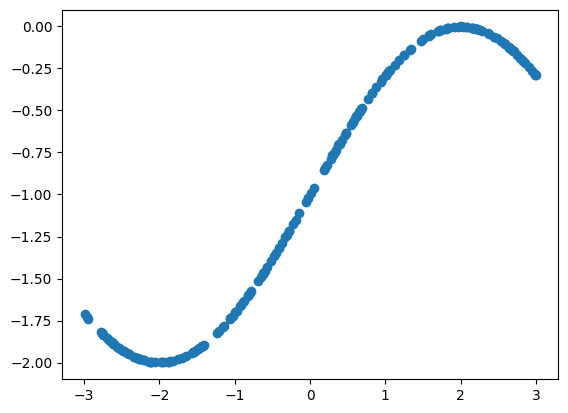

In [51]:
plt.scatter(X, Y)

In [4]:
Y.shape

(200, 1)

Loss = 1.2917860974504827
epoch: 0
--------------------------------------------
Loss = 0.13249915279465557
epoch: 1
--------------------------------------------
Loss = 0.057412084047903926
epoch: 2
--------------------------------------------
Loss = 0.040723638390182566
epoch: 3
--------------------------------------------
Loss = 0.034927081989245906
epoch: 4
--------------------------------------------
Loss = 0.030910820797489434
epoch: 5
--------------------------------------------
Loss = 0.027499420945723097
epoch: 6
--------------------------------------------
Loss = 0.024530634656093876
epoch: 7
--------------------------------------------
Loss = 0.02195308219996532
epoch: 8
--------------------------------------------
Loss = 0.019727276706409298
epoch: 9
--------------------------------------------
Loss = 0.017815830317935002
epoch: 10
--------------------------------------------
Loss = 0.016182937070797095
epoch: 11
--------------------------------------------
Loss = 0.014794757

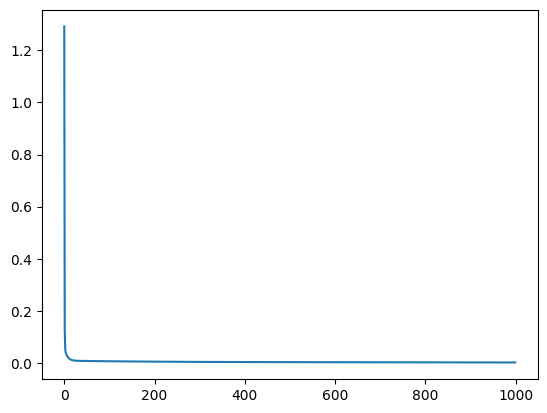

In [52]:
import numpy as np
import matplotlib.pyplot as plt

class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(4,1))
W2 = np.random.normal(0,1,(4,4))
W3 = np.random.normal(0,1,(1,4))
b1 = np.random.normal(0,1,(4,1))
b2 = np.random.normal(0,1,(4,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((4,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((4,1)),activation1.output.reshape((1,4)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)


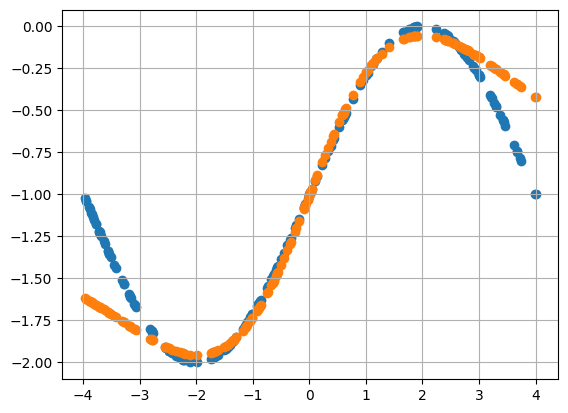

In [53]:
i = 1
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()

# i = 2

Loss = 1.0894597074475194
epoch: 0
--------------------------------------------
Loss = 0.5037336391740779
epoch: 1
--------------------------------------------
Loss = 0.5003119864326158
epoch: 2
--------------------------------------------
Loss = 0.49843147634518936
epoch: 3
--------------------------------------------
Loss = 0.4971804160024193
epoch: 4
--------------------------------------------
Loss = 0.49617693896232706
epoch: 5
--------------------------------------------
Loss = 0.4952628266056328
epoch: 6
--------------------------------------------
Loss = 0.49436964629916
epoch: 7
--------------------------------------------
Loss = 0.49346332361886225
epoch: 8
--------------------------------------------
Loss = 0.4925230735143121
epoch: 9
--------------------------------------------
Loss = 0.49153468418886903
epoch: 10
--------------------------------------------
Loss = 0.49048932048795635
epoch: 11
--------------------------------------------
Loss = 0.48938380448235447
epoch: 1

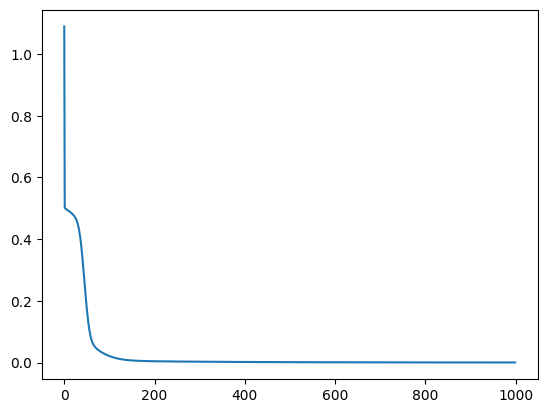

In [54]:
import numpy as np
import matplotlib.pyplot as plt

i = 2
X = np.random.uniform(-3, 3, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1



class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(4,1))
W2 = np.random.normal(0,1,(4,4))
W3 = np.random.normal(0,1,(1,4))
b1 = np.random.normal(0,1,(4,1))
b2 = np.random.normal(0,1,(4,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((4,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((4,1)),activation1.output.reshape((1,4)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)


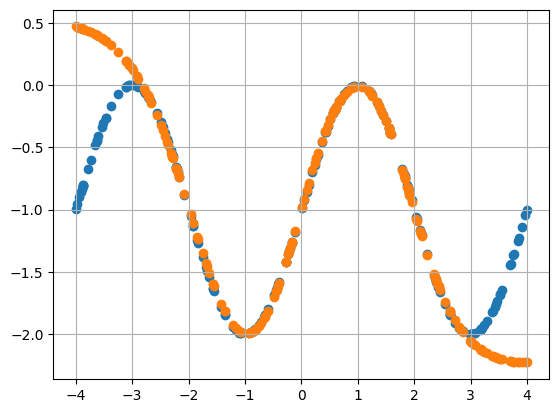

In [55]:
i = 2
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()

# i = 4

Loss = 0.6835939140000348
epoch: 0
--------------------------------------------
Loss = 0.5649385399184076
epoch: 1
--------------------------------------------
Loss = 0.5313643689833232
epoch: 2
--------------------------------------------
Loss = 0.5152053836891293
epoch: 3
--------------------------------------------
Loss = 0.5079268239080039
epoch: 4
--------------------------------------------
Loss = 0.504763039267627
epoch: 5
--------------------------------------------
Loss = 0.5033565842287652
epoch: 6
--------------------------------------------
Loss = 0.502659715931678
epoch: 7
--------------------------------------------
Loss = 0.5022395051802394
epoch: 8
--------------------------------------------
Loss = 0.5019250016634802
epoch: 9
--------------------------------------------
Loss = 0.5016504983624068
epoch: 10
--------------------------------------------
Loss = 0.5013911605288617
epoch: 11
--------------------------------------------
Loss = 0.5011377541268335
epoch: 12
----

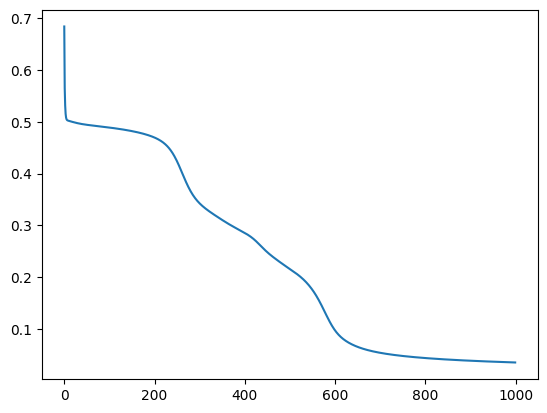

In [56]:
import numpy as np
import matplotlib.pyplot as plt

i = 4
X = np.random.uniform(-3, 3, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1



class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(4,1))
W2 = np.random.normal(0,1,(4,4))
W3 = np.random.normal(0,1,(1,4))
b1 = np.random.normal(0,1,(4,1))
b2 = np.random.normal(0,1,(4,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((4,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((4,1)),activation1.output.reshape((1,4)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)

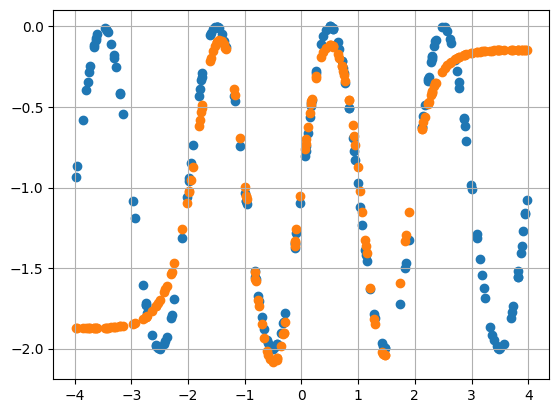

In [57]:
i = 4
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()

# i = 8

Loss = 0.5936643613054798
epoch: 0
--------------------------------------------
Loss = 0.5478336615394322
epoch: 1
--------------------------------------------
Loss = 0.5411545937100852
epoch: 2
--------------------------------------------
Loss = 0.5360346730695396
epoch: 3
--------------------------------------------
Loss = 0.5321310285644245
epoch: 4
--------------------------------------------
Loss = 0.5292145784759726
epoch: 5
--------------------------------------------
Loss = 0.527102765693991
epoch: 6
--------------------------------------------
Loss = 0.525631239190341
epoch: 7
--------------------------------------------
Loss = 0.5246483424415938
epoch: 8
--------------------------------------------
Loss = 0.5240198427698288
epoch: 9
--------------------------------------------
Loss = 0.5236348093364933
epoch: 10
--------------------------------------------
Loss = 0.5234080740158727
epoch: 11
--------------------------------------------
Loss = 0.5232786448023792
epoch: 12
----

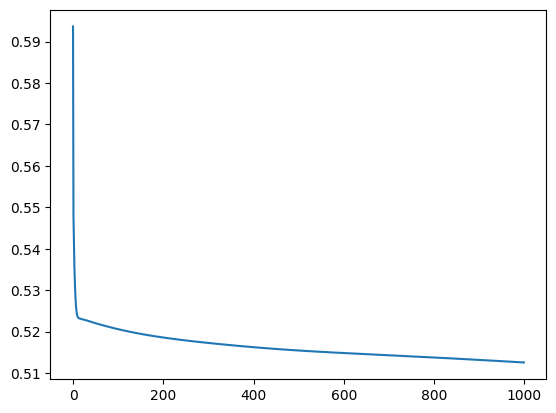

In [58]:
import numpy as np
import matplotlib.pyplot as plt

i = 8
X = np.random.uniform(-3, 3, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1



class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(4,1))
W2 = np.random.normal(0,1,(4,4))
W3 = np.random.normal(0,1,(1,4))
b1 = np.random.normal(0,1,(4,1))
b2 = np.random.normal(0,1,(4,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((4,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((4,1)),activation1.output.reshape((1,4)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)

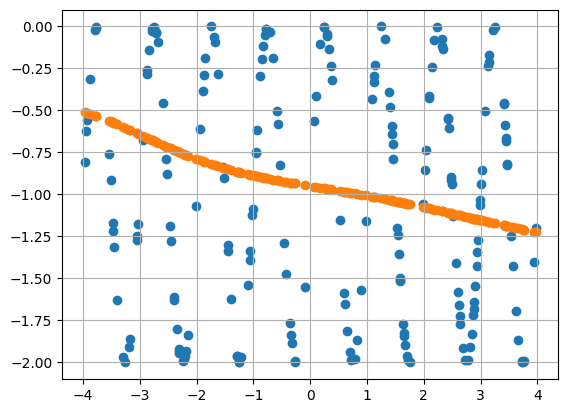

In [59]:
i = 8
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(i*np.pi*X/4) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((4,1))) + b2[:,0].reshape((4,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()

# HW2_ex_2_4

Loss = 0.49246756802470143
epoch: 0
--------------------------------------------
Loss = 0.4853120189989356
epoch: 1
--------------------------------------------
Loss = 0.48003083262996166
epoch: 2
--------------------------------------------
Loss = 0.4751194755036798
epoch: 3
--------------------------------------------
Loss = 0.4705707544431073
epoch: 4
--------------------------------------------
Loss = 0.4664317977678729
epoch: 5
--------------------------------------------
Loss = 0.4627639784666563
epoch: 6
--------------------------------------------
Loss = 0.45961351404666273
epoch: 7
--------------------------------------------
Loss = 0.4569943941210386
epoch: 8
--------------------------------------------
Loss = 0.4548843387265327
epoch: 9
--------------------------------------------
Loss = 0.45323125708328016
epoch: 10
--------------------------------------------
Loss = 0.4519652294492409
epoch: 11
--------------------------------------------
Loss = 0.4510109447304744
epoch: 1

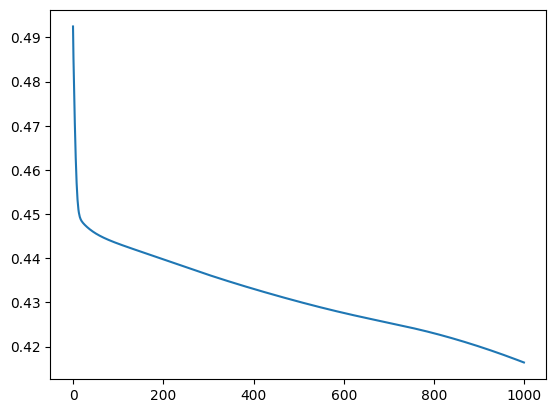

In [61]:
import numpy as np
import matplotlib.pyplot as plt

j = 2
X = np.random.uniform(-2, 2, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1



class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(j,1))
W2 = np.random.normal(0,1,(j,j))
W3 = np.random.normal(0,1,(1,j))
b1 = np.random.normal(0,1,(j,1))
b2 = np.random.normal(0,1,(j,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((j,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((j,1)),activation1.output.reshape((1,j)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)

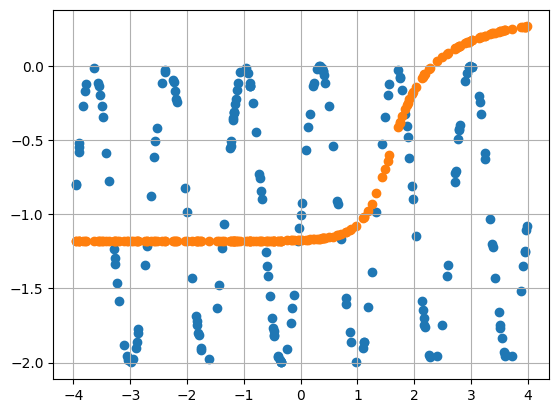

In [62]:
j = 2
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()

Loss = 0.5704726499582968
epoch: 0
--------------------------------------------
Loss = 0.5402618772469845
epoch: 1
--------------------------------------------
Loss = 0.5308541215733729
epoch: 2
--------------------------------------------
Loss = 0.5266818330190578
epoch: 3
--------------------------------------------
Loss = 0.524722864205078
epoch: 4
--------------------------------------------
Loss = 0.523699445317925
epoch: 5
--------------------------------------------
Loss = 0.5230808763320259
epoch: 6
--------------------------------------------
Loss = 0.5226469521062708
epoch: 7
--------------------------------------------
Loss = 0.5223043244485157
epoch: 8
--------------------------------------------
Loss = 0.5220117027496224
epoch: 9
--------------------------------------------
Loss = 0.5217497174211878
epoch: 10
--------------------------------------------
Loss = 0.5215086413942522
epoch: 11
--------------------------------------------
Loss = 0.5212832294407777
epoch: 12
----

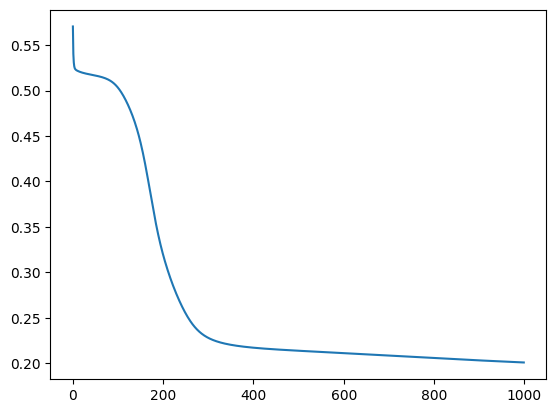

In [63]:
import numpy as np
import matplotlib.pyplot as plt

j = 3
X = np.random.uniform(-2, 2, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1



class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(j,1))
W2 = np.random.normal(0,1,(j,j))
W3 = np.random.normal(0,1,(1,j))
b1 = np.random.normal(0,1,(j,1))
b2 = np.random.normal(0,1,(j,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((j,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((j,1)),activation1.output.reshape((1,j)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)

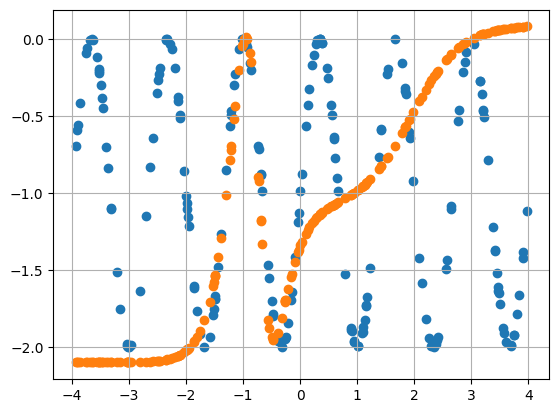

In [64]:
j = 3
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()

Loss = 1.2501008417795874
epoch: 0
--------------------------------------------
Loss = 0.5098437392543428
epoch: 1
--------------------------------------------
Loss = 0.5058089540764823
epoch: 2
--------------------------------------------
Loss = 0.5035573687953508
epoch: 3
--------------------------------------------
Loss = 0.5021005673218747
epoch: 4
--------------------------------------------
Loss = 0.5010257247521895
epoch: 5
--------------------------------------------
Loss = 0.5001519821533109
epoch: 6
--------------------------------------------
Loss = 0.4993959722774467
epoch: 7
--------------------------------------------
Loss = 0.49871692489884695
epoch: 8
--------------------------------------------
Loss = 0.4980934470910695
epoch: 9
--------------------------------------------
Loss = 0.49751336348834
epoch: 10
--------------------------------------------
Loss = 0.49696911193782073
epoch: 11
--------------------------------------------
Loss = 0.4964555758537973
epoch: 12
--

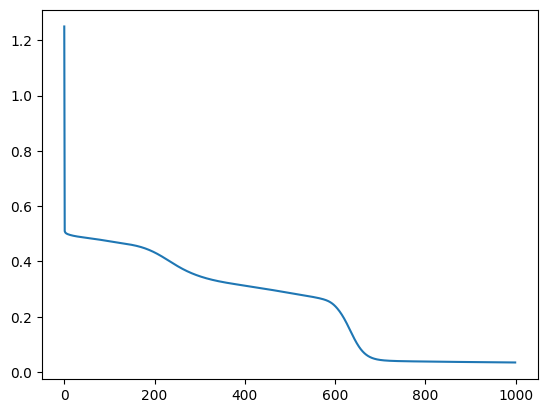

In [68]:
import numpy as np
import matplotlib.pyplot as plt

j = 4
X = np.random.uniform(-2, 2, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1



class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(j,1))
W2 = np.random.normal(0,1,(j,j))
W3 = np.random.normal(0,1,(1,j))
b1 = np.random.normal(0,1,(j,1))
b2 = np.random.normal(0,1,(j,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((j,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((j,1)),activation1.output.reshape((1,j)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)

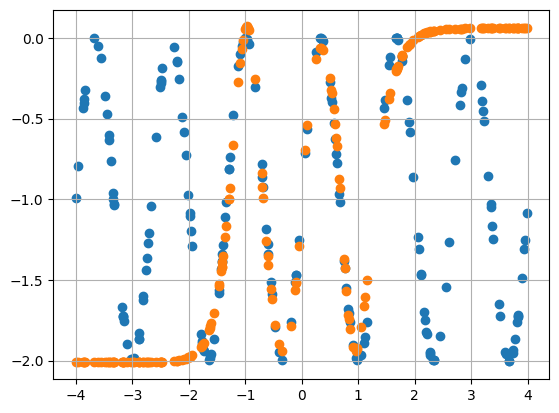

In [69]:
j = 4
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()

Loss = 0.5853358657545271
epoch: 0
--------------------------------------------
Loss = 0.5365646924412072
epoch: 1
--------------------------------------------
Loss = 0.5349365338052707
epoch: 2
--------------------------------------------
Loss = 0.5338279073706467
epoch: 3
--------------------------------------------
Loss = 0.5330462381777546
epoch: 4
--------------------------------------------
Loss = 0.5324798543699594
epoch: 5
--------------------------------------------
Loss = 0.5320601779604607
epoch: 6
--------------------------------------------
Loss = 0.5317427969888538
epoch: 7
--------------------------------------------
Loss = 0.5314977536754113
epoch: 8
--------------------------------------------
Loss = 0.5313042149533169
epoch: 9
--------------------------------------------
Loss = 0.5311473717723412
epoch: 10
--------------------------------------------
Loss = 0.5310165390968977
epoch: 11
--------------------------------------------
Loss = 0.5309039367943238
epoch: 12
--

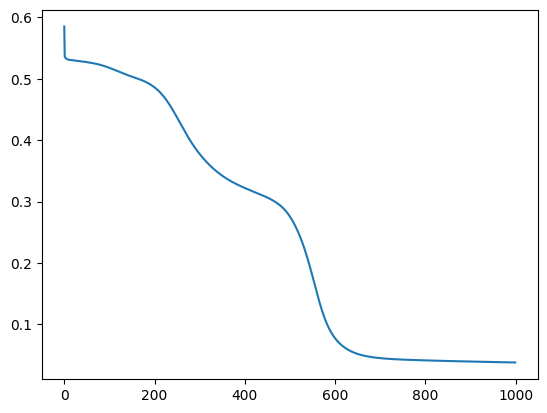

In [74]:
import numpy as np
import matplotlib.pyplot as plt

j = 5
X = np.random.uniform(-2, 2, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1



class Linear:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = f_in
    
    def backward(self, b_in):
        return b_in
    
class sigmoid:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = 1/(1 + np.exp(-f_in))
    
    def backward(self, b_in):
        return np.multiply(b_in, np.multiply(self.output, 1-self.output))
    
class ReLU:

    def __init__(self):
        pass

    def forward(self, f_in):
        self.output = np.maximum(0,f_in)
        self.input = f_in
    
    def backward(self, b_in):
        self.b_output = b_in
        self.b_output[self.input<=0] = 0
        return self.b_output


class MSE_loss:

    def __init__(self):
        pass

    def forward(self, y_true, y_predicted):
        self.output = np.mean((y_true-y_predicted)**2,axis = 0)

    def backward(self,output, label):

        return -2*(label-output)
    


W1 = np.random.normal(0,1,(j,1))
W2 = np.random.normal(0,1,(j,j))
W3 = np.random.normal(0,1,(1,j))
b1 = np.random.normal(0,1,(j,1))
b2 = np.random.normal(0,1,(j,1))
b3 = np.random.normal(0,1,(1,1))



activation1 = sigmoid()
activation2 = sigmoid()
activation3 = Linear()

lr = 0.01
Loss = MSE_loss()



mean_Loss = []
Losses = []

for epoch in range(1000):

    
    # SGD optimizer
    for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        Loss.forward(d, activation3.output)
        
        
        # Backward Propagation

        loss_derivative1 = Loss.backward(activation3.output, d)
        s3 = activation3.backward(loss_derivative1)

        loss_derivative2 = np.matmul(W3.T, s3)
        s2 = activation2.backward(loss_derivative2)

        loss_derivative3 = np.matmul(W2.T, s2)
        s1 = activation1.backward(loss_derivative3)

        # updating weights and biases
        W1 = W1 - lr*np.matmul(s1.reshape((j,1)),x)
        W2 = W2 - lr*np.matmul(s2.reshape((j,1)),activation1.output.reshape((1,j)))
        W3 = W3 - lr*s3*activation2.output.T
        
        b1 = b1 - lr*s1
        b2 = b2 - lr*s2
        b3 = b3 - lr*s3

        mean_Loss.append(Loss.output)
    
    
        
    

    
        
    print(f"Loss = {np.mean(mean_Loss)}")
    print(f"epoch: {epoch}")

    print("--------------------------------------------")
    
    Losses.append(np.mean(mean_Loss))
    mean_Loss = []


plt.plot(range(len(Losses)), Losses)

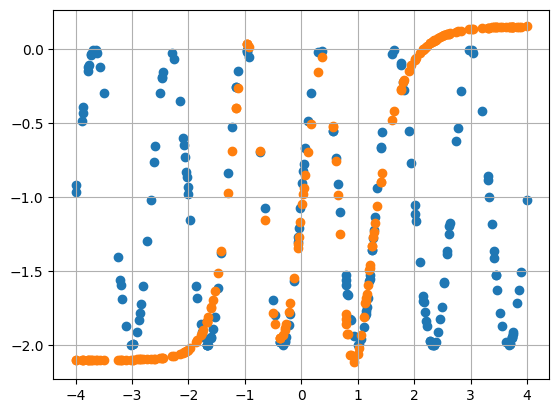

In [75]:
j = 5
X = np.random.uniform(-4, 4, (200, 1))
Y = np.sin(3*np.pi*X/2) - 1

g2 = []
for i in range(X.shape[0]):

        x = X[i,0].reshape((1,1))
        d = Y[i,0].reshape((1,1))


        n1 = np.matmul(W1, x) + b1
        activation1.forward(n1)
        n2 = np.matmul(W2, activation1.output.reshape((j,1))) + b2[:,0].reshape((j,1))
        activation2.forward(n2)
        n3 = np.matmul(W3, activation2.output) + b3[:,0]
        activation3.forward(n3)
        g2.append(activation3.output)

import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.scatter(X,np.array(g2))
plt.grid()